In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [2]:
data = pd.read_csv('data/clustering_basics.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


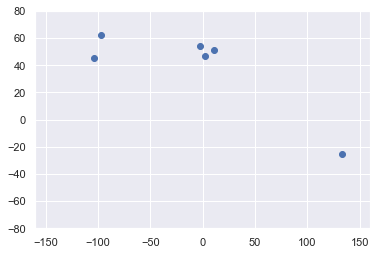

In [5]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-160, 160)
plt.ylim(-80,80)
plt.show()

### Selecting features

In [7]:
x = data.iloc[:,1:3] #all the rows, column with indexes 1 and 2
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Clustering

In [8]:
kmeans = KMeans(2) # 2 clusters

In [9]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [10]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

### Clustering results

In [11]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [12]:
clusters_df = data.copy()

In [13]:
clusters_df['Clusters'] = identified_clusters

In [15]:
clusters_df

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


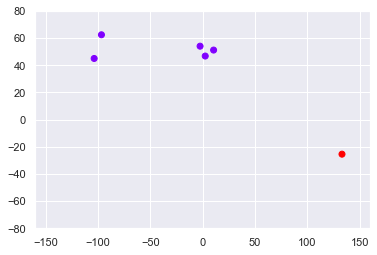

In [21]:
plt.scatter(clusters_df['Longitude'], clusters_df['Latitude'], c=clusters_df['Clusters'], cmap='rainbow')
plt.xlim(-160, 160)
plt.ylim(-80, 80)
plt.show()

### Let's do the same but with more clusters ...

In [22]:
kmeans_1 = KMeans(3) # 3 clusters

In [23]:
kmeans_1.fit(x)

KMeans(n_clusters=3)

In [24]:
clusters_1 = kmeans_1.fit_predict(x)
clusters_1

array([1, 1, 0, 0, 0, 2])

In [25]:
df_clusters_1 = data.copy()
df_clusters_1['Clusters'] = clusters_1
df_clusters_1

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


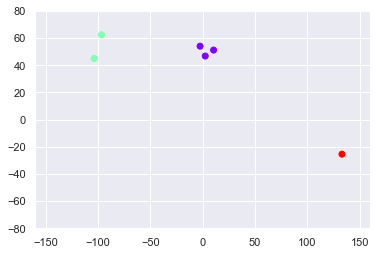

In [26]:
plt.scatter(df_clusters_1['Longitude'], df_clusters_1['Latitude'], c=df_clusters_1['Clusters'], cmap='rainbow')
plt.xlim(-160,160)
plt.ylim(-80,80)
plt.show()